In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# df_gs = pd.read_csv("outputs/speed/times_gs.csv")
# df_direct = pd.read_csv("outputs/speed/times_simple.csv")
# df_sparse = pd.read_csv("outputs/speed/times_sparse.csv")

In [3]:
df_gs = pd.read_csv("outputs/speed/new/speed_gs.csv")
df_direct = pd.read_csv("outputs/speed/new/speed_direct.csv")
df_sparse = pd.read_csv("outputs/speed/new/speed_sparse.csv")

In [4]:
df_sparse, df_direct, df_gs

(      N       time       std
 0     7   0.001053  0.000007
 1    14   0.002230  0.000019
 2    28   0.007414  0.000268
 3    56   0.030915  0.000246
 4    84   0.075951  0.000534
 5   112   0.225742  0.006906
 6   168   0.418568  0.002520
 7   224   0.829541  0.021589
 8   336   2.182746  0.081962
 9   448   4.232445  0.244608
 10  672  14.665246  0.377124
 11  896  29.016232  0.346998,
      N        time       std
 0    7    0.000575  0.000010
 1   14    0.002649  0.000424
 2   28    0.032495  0.001236
 3   56    0.523539  0.038807
 4   84    4.269587  0.234476
 5  112   21.874066  0.302317
 6  168  234.567942  0.796414,
      N        time       std
 0    7    0.016008  0.000368
 1   14    0.140673  0.001447
 2   28    1.162354  0.009651
 3   56    9.500849  0.058290
 4   84   32.079082  0.031682
 5  112   77.298081  0.878514
 6  168  255.030932  3.153147)

In [5]:
df_sparse["N"].values[:7], df_sparse["time"].values[:7]

(array([  7,  14,  28,  56,  84, 112, 168]),
 array([0.00105256, 0.00222999, 0.00741386, 0.03091528, 0.07595093,
        0.22574191, 0.41856782]))

In [6]:
df_gs["N"].values, df_gs["time"].values

(array([  7,  14,  28,  56,  84, 112, 168]),
 array([1.60083886e-02, 1.40673007e-01, 1.16235443e+00, 9.50084852e+00,
        3.20790820e+01, 7.72980811e+01, 2.55030932e+02]))

In [7]:
" & ".join([f"{x:.3f}" for x in df_gs["time"].values])

'0.016 & 0.141 & 1.162 & 9.501 & 32.079 & 77.298 & 255.031'

## GS

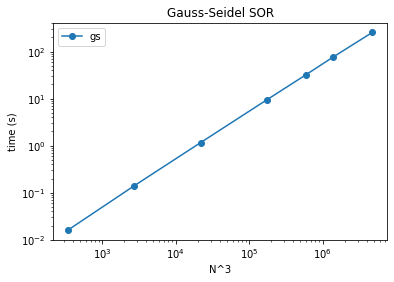

In [8]:
plt.plot(df_gs["N"]**3, df_gs["time"], label="gs", marker="o")

plt.title("Gauss-Seidel SOR")
plt.xlabel("N^3")
plt.ylabel("time (s)")
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.show()

In [9]:
coeffs, error = np.polyfit(x=df_gs["N"] ** 3, y=df_gs["time"], deg=1, cov=True)
coeffs, error

(array([5.38199368e-05, 2.45996864e-01]),
 array([[ 2.75881829e-14, -2.73513935e-08],
        [-2.73513935e-08,  9.78967665e-02]]))

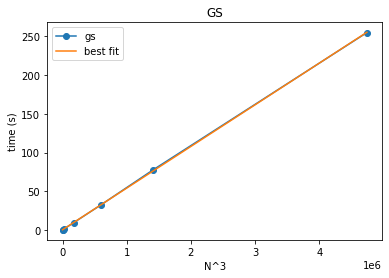

In [10]:
coeffs, error = np.polyfit(x=df_gs["N"] ** 3, y=df_gs["time"], deg=1, cov=True)
coeffs, error

plt.plot(df_gs["N"]**3, df_gs["time"], label="gs", marker="o")
x = np.linspace(7, np.max(df_gs["N"]) ** 3 + 1, 100)
plt.plot(x, np.polyval(coeffs, x), label="best fit")

plt.title("GS")
plt.xlabel("N^3")
plt.ylabel("time (s)")
plt.legend()
# plt.xscale("log")
# plt.yscale("log")
plt.show()

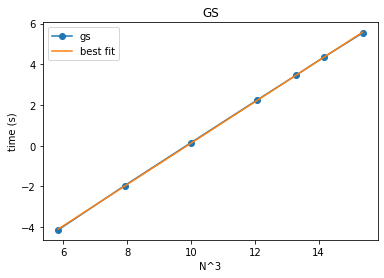

In [11]:
coeffs, error = np.polyfit(x=np.log(df_gs["N"] ** 3), y=np.log(df_gs["time"]), deg=1, cov=True)
coeffs, error

plt.plot(np.log(df_gs["N"] ** 3), np.log(df_gs["time"]), label="gs", marker="o")
# x = np.linspace(7, np.log(np.max(df_gs["N"]) ** 3) + 1, 100)
plt.plot(np.log(df_gs["N"] ** 3), np.polyval(coeffs, np.log(df_gs["N"] ** 3)), label="best fit")

plt.title("GS")
plt.xlabel("N^3")
plt.ylabel("time (s)")
plt.legend()
# plt.xscale("log")
# plt.yscale("log")
plt.show()

## Sparse

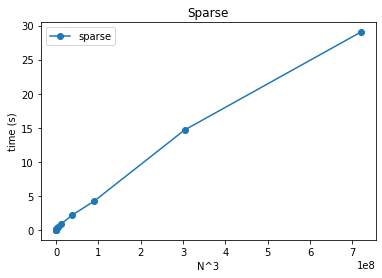

In [12]:
plt.plot(df_sparse["N"]**3, df_sparse["time"], label="sparse", marker="o")

plt.title("Sparse")
plt.xlabel("N^3")
plt.ylabel("time (s)")
plt.legend()
# plt.xscale("log")
plt.show()

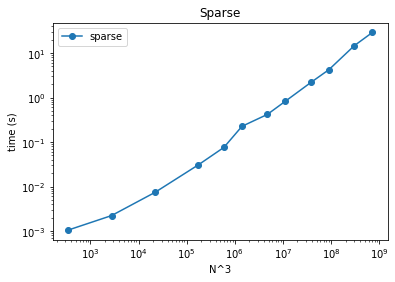

In [13]:
plt.plot(df_sparse["N"]**3, df_sparse["time"], label="sparse", marker="o")

plt.title("Sparse")
plt.xlabel("N^3")
plt.ylabel("time (s)")
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.show()

In [14]:
coeffs, error = np.polyfit(x=df_sparse["N"] ** 3, y=df_sparse["time"], deg=1, cov=True)
coeffs, error

(array([4.10865621e-08, 3.05456388e-01]),
 array([[ 9.68176701e-19, -9.43016511e-11],
        [-9.43016511e-11,  4.99572161e-02]]))

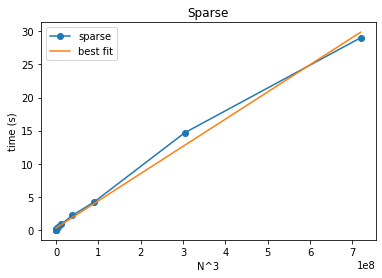

In [15]:
coeffs, error = np.polyfit(x=df_sparse["N"] ** 3, y=df_sparse["time"], deg=1, cov=True)
coeffs, error

plt.plot(df_sparse["N"]**3, df_sparse["time"], label="sparse", marker="o")
x = np.linspace(7, np.max(df_sparse["N"]) ** 3 + 1, 100)
plt.plot(x, np.polyval(coeffs, x), label="best fit")

plt.title("Sparse")
plt.xlabel("N^3")
plt.ylabel("time (s)")
plt.legend()
# plt.xscale("log")
plt.show()

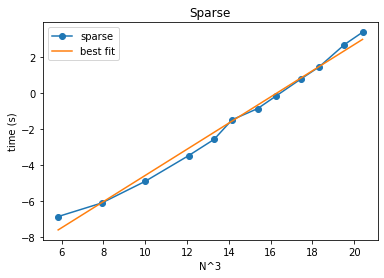

In [16]:
coeffs, error = np.polyfit(x=np.log(df_sparse["N"] ** 3), y=np.log(df_sparse["time"]), deg=1, cov=True)
coeffs, error

plt.plot(np.log(df_sparse["N"] ** 3), np.log(df_sparse["time"]), label="sparse", marker="o")
plt.plot(np.log(df_sparse["N"] ** 3), np.polyval(coeffs, np.log(df_sparse["N"] ** 3)), label="best fit")

plt.title("Sparse")
plt.xlabel("N^3")
plt.ylabel("time (s)")
plt.legend()
plt.show()

## Direct

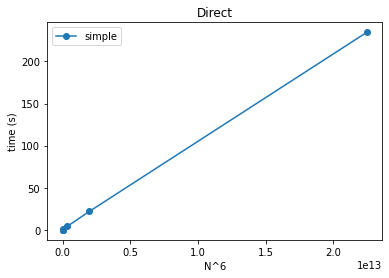

In [17]:
plt.plot(df_direct["N"]**6, df_direct["time"], label="simple", marker="o")

plt.title("Direct")
plt.xlabel("N^6")
plt.ylabel("time (s)")
plt.legend()
# plt.xscale("log")
plt.show()

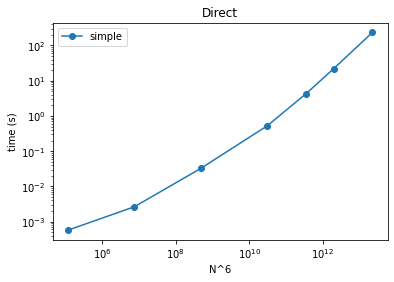

In [18]:
plt.plot(df_direct["N"]**6, df_direct["time"], label="simple", marker="o")

plt.title("Direct")
plt.xlabel("N^6")
plt.ylabel("time (s)")
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.show()

In [19]:
coeffs, error = np.polyfit(x=df_direct["N"] ** 6, y=df_direct["time"], deg=1, cov=True)
coeffs, error

(array([1.04217744e-11, 3.42703482e-01]),
 array([[ 6.42241191e-28, -2.27899519e-15],
        [-2.27899519e-15,  4.67468055e-02]]))

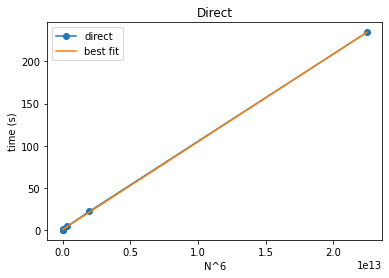

In [20]:
coeffs, error = np.polyfit(x=df_direct["N"] ** 6, y=df_direct["time"], deg=1, cov=True)
coeffs, error

plt.plot(df_direct["N"]**6, df_direct["time"], label="direct", marker="o")
x = np.linspace(7, np.max(df_direct["N"]) ** 6 + 1, 100)
plt.plot(x, np.polyval(coeffs, x), label="best fit")

plt.title("Direct")
plt.xlabel("N^6")
plt.ylabel("time (s)")
plt.legend()
# plt.xscale("log")
plt.show()

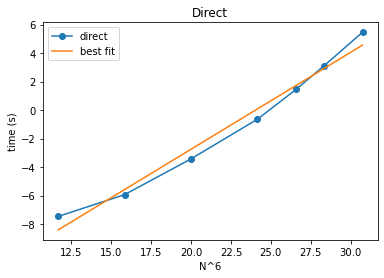

In [21]:
coeffs, error = np.polyfit(x=np.log(df_direct["N"] ** 6), y=np.log(df_direct["time"]), deg=1, cov=True)
coeffs, error

plt.plot(np.log(df_direct["N"] ** 6), np.log(df_direct["time"]), label="direct", marker="o")
plt.plot(np.log(df_direct["N"] ** 6), np.polyval(coeffs, np.log(df_direct["N"] ** 6)), label="best fit")

plt.title("Direct")
plt.xlabel("N^6")
plt.ylabel("time (s)")
plt.legend()
# plt.xscale("log")
plt.show()

Linear in N^6

In [22]:
# df = df_sparse.copy()
# df["N_3"] = df["N"] ** 3
# df[["N_3", "time"]].to_csv("data/speed/sparse_speed.csv", index=False)
# df[["N_3", "time", "N"]]